<a href="https://colab.research.google.com/github/nithishk20/Machine-Learning/blob/main/CNN_model_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [9]:
#loading dataset
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [15]:
#normalize the image
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

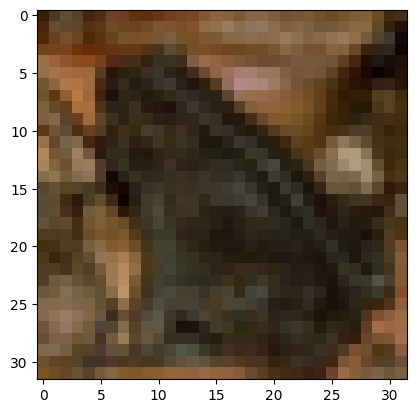

In [17]:
plt.imshow(x_test[30])

In [18]:
#CNN
cifar10_model=tf.keras.models.Sequential()

In [19]:
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

In [20]:
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

In [21]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [22]:
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [23]:
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [24]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [25]:
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [26]:
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

In [27]:
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [28]:
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [29]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [30]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [31]:
cifar10_model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 327s 207ms/step - loss: 1.4189 - sparse_categorical_accuracy: 0.4845
Epoch 2/15
1563/1563 [==============================] - 336s 215ms/step - loss: 1.0212 - sparse_categorical_accuracy: 0.6370
Epoch 3/15
1563/1563 [==============================] - 319s 204ms/step - loss: 0.8702 - sparse_categorical_accuracy: 0.6914
Epoch 4/15
1563/1563 [==============================] - 304s 195ms/step - loss: 0.7816 - sparse_categorical_accuracy: 0.7252
Epoch 5/15
1563/1563 [==============================] - 310s 198ms/step - loss: 0.7077 - sparse_categorical_accuracy: 0.7496
Epoch 6/15
1563/1563 [==============================] - 310s 198ms/step - loss: 0.6569 - sparse_categorical_accuracy: 0.7683
Epoch 7/15
1563/1563 [==============================] - 306s 196ms/step - loss: 0.6094 - sparse_categorical_accuracy: 0.7847
Epoch 8/15
1563/1563 [==============================] - 306s 196ms/step - loss: 0.5788 - sparse_categorical_accuracy: 0.7957


In [32]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 19s 59ms/step - loss: 0.6756 - sparse_categorical_accuracy: 0.7826


In [33]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7825999855995178
